
# 💊 Price Sensitivity Analysis for Capsule Products (Size 30)
This notebook analyzes how price changes influence sales volume, using competitors' data.
The goal is to estimate the likely impact of a 10% price increase for our product: Capsules, 30 units, current price $19.97.


## Step 1: Load and Explore Data

In [1]:

import pandas as pd

# Load Excel file
file_path = r"C:\Users\Administrator\Desktop\Тестове завдання\TASK 2 - Price Analysis.xlsx"
df = pd.read_excel(file_path, sheet_name='DATA')

# Display basic info and first rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   WEEKS                140 non-null    int64         
 1   END DATE             140 non-null    datetime64[ns]
 2   BRAND                140 non-null    object        
 3   PRODUCT              140 non-null    object        
 4   FORM                 140 non-null    object        
 5   SIZE                 140 non-null    int64         
 6   Dollars              140 non-null    float64       
 7   Units                140 non-null    int64         
 8   Price                140 non-null    float64       
 9   # of Stores          140 non-null    float64       
 10  # of Stores Selling  140 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 12.2+ KB


,WEEKS,END DATE,BRAND,PRODUCT,FORM,SIZE,Dollars,Units,Price,# of Stores,# of Stores Selling
0,4,2023-01-01,Brand 5,Product 19,CAPSULE,20,298128.99,14899,20.01,4580.00,3592.09
1,4,2023-01-29,Brand 5,Product 19,CAPSULE,20,288123.99,14399,20.01,4580.75,3621.54
2,4,2023-02-26,Brand 5,Product 19,CAPSULE,20,284944.66,14233,20.02,4579.75,3600.60
3,4,2023-03-26,Brand 5,Product 19,CAPSULE,20,296087.97,14797,20.01,4576.50,3631.00
4,4,2023-04-23,Brand 5,Product 19,CAPSULE,20,292543.92,14598,20.04,4569.25,3599.66


## Step 2: Filter Relevant Products - Capsules, Size 30

In [3]:
# Filter only products that match FORM = 'CAPSULE' and SIZE = 30
df = df[(df['FORM'].str.upper() == 'CAPSULE') & (df['SIZE'] == 30)].copy()

# Convert 'Dollars' and 'Price' to string first, then clean and convert to float
for col in ['Dollars', 'Price']:
    df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True).str.replace(',', '').astype(float)

# Convert 'Units' from string with commas to int
df['Units'] = df['Units'].astype(str).str.replace(',', '').astype(int)

# Convert 'END DATE' to datetime format
df['END DATE'] = pd.to_datetime(df['END DATE'], dayfirst=True)

# Sort by brand/product/date
df = df.sort_values(['BRAND', 'PRODUCT', 'END DATE'])

df.head()


,WEEKS,END DATE,BRAND,PRODUCT,FORM,SIZE,Dollars,Units,Price,# of Stores,# of Stores Selling
112,4,2023-01-01,Brand 12,Product 38,CAPSULE,30,245029.78,14422,16.99,4580.00,3976.81
113,4,2023-01-29,Brand 12,Product 38,CAPSULE,30,245811.32,14468,16.99,4580.75,4009.53
114,4,2023-02-26,Brand 12,Product 38,CAPSULE,30,230588.28,13572,16.99,4579.75,3968.81
115,4,2023-03-26,Brand 12,Product 38,CAPSULE,30,198375.24,11676,16.99,4576.50,3841.51
116,4,2023-04-23,Brand 12,Product 38,CAPSULE,30,192870.48,11352,16.99,4569.25,3834.51


## Step 3: Analyze Trends per Brand/Product

In [4]:

# Group by product and calculate relevant % changes
df['Price Change %'] = df.groupby(['BRAND', 'PRODUCT'])['Price'].pct_change() * 100
df['Units Change %'] = df.groupby(['BRAND', 'PRODUCT'])['Units'].pct_change() * 100
df['Stores Selling Change %'] = df.groupby(['BRAND', 'PRODUCT'])['# of Stores Selling'].pct_change() * 100
df['Stores Change %'] = df.groupby(['BRAND', 'PRODUCT'])['# of Stores'].pct_change() * 100

df.head(10)


,WEEKS,END DATE,BRAND,PRODUCT,FORM,SIZE,Dollars,Units,Price,# of Stores,# of Stores Selling,Price Change %,Units Change %,Stores Selling Change %,Stores Change %
112,4,2023-01-01,Brand 12,Product 38,CAPSULE,30,245029.78,14422,16.99,4580.00,3976.81,NaN,NaN,NaN,NaN
113,4,2023-01-29,Brand 12,Product 38,CAPSULE,30,245811.32,14468,16.99,4580.75,4009.53,0.000000,0.318957,0.822770,0.016376
114,4,2023-02-26,Brand 12,Product 38,CAPSULE,30,230588.28,13572,16.99,4579.75,3968.81,0.000000,-6.192978,-1.015580,-0.021830
115,4,2023-03-26,Brand 12,Product 38,CAPSULE,30,198375.24,11676,16.99,4576.50,3841.51,0.000000,-13.969938,-3.207511,-0.070965
116,4,2023-04-23,Brand 12,Product 38,CAPSULE,30,192870.48,11352,16.99,4569.25,3834.51,0.000000,-2.774923,-0.182220,-0.158418
117,4,2023-05-21,Brand 12,Product 38,CAPSULE,30,200901.75,11255,17.85,4564.50,3784.88,5.061801,-0.854475,-1.294298,-0.103956
118,4,2023-06-18,Brand 12,Product 38,CAPSULE,30,239226.00,12268,19.50,4560.75,3837.87,9.243697,9.000444,1.400044,-0.082156
119,4,2023-07-16,Brand 12,Product 38,CAPSULE,30,246932.82,12359,19.98,4560.00,3875.09,2.461538,0.741767,0.969809,-0.016445
120,4,2023-08-13,Brand 12,Product 38,CAPSULE,30,252507.24,12638,19.98,4560.00,3836.78,0.000000,2.257464,-0.988622,0.000000
121,4,2023-09-10,Brand 12,Product 38,CAPSULE,30,252640.47,12651,19.97,4559.00,3834.12,-0.050050,0.102864,-0.069329,-0.021930


## Step 4: Categorize Price Change Behavior

In [5]:

def categorize_change(change):
    if pd.isna(change):return 'Stable'
    elif change > 1:return 'Up'
    elif change < -1:return 'Down'
    else:return 'Stable'

df['Price Trend'] = df['Price Change %'].apply(categorize_change)
df.head(10)


,WEEKS,END DATE,BRAND,PRODUCT,FORM,SIZE,Dollars,Units,Price,# of Stores,# of Stores Selling,Price Change %,Units Change %,Stores Selling Change %,Stores Change %,Price Trend
112,4,2023-01-01,Brand 12,Product 38,CAPSULE,30,245029.78,14422,16.99,4580.00,3976.81,NaN,NaN,NaN,NaN,Stable
113,4,2023-01-29,Brand 12,Product 38,CAPSULE,30,245811.32,14468,16.99,4580.75,4009.53,0.000000,0.318957,0.822770,0.016376,Stable
114,4,2023-02-26,Brand 12,Product 38,CAPSULE,30,230588.28,13572,16.99,4579.75,3968.81,0.000000,-6.192978,-1.015580,-0.021830,Stable
115,4,2023-03-26,Brand 12,Product 38,CAPSULE,30,198375.24,11676,16.99,4576.50,3841.51,0.000000,-13.969938,-3.207511,-0.070965,Stable
116,4,2023-04-23,Brand 12,Product 38,CAPSULE,30,192870.48,11352,16.99,4569.25,3834.51,0.000000,-2.774923,-0.182220,-0.158418,Stable
117,4,2023-05-21,Brand 12,Product 38,CAPSULE,30,200901.75,11255,17.85,4564.50,3784.88,5.061801,-0.854475,-1.294298,-0.103956,Up
118,4,2023-06-18,Brand 12,Product 38,CAPSULE,30,239226.00,12268,19.50,4560.75,3837.87,9.243697,9.000444,1.400044,-0.082156,Up
119,4,2023-07-16,Brand 12,Product 38,CAPSULE,30,246932.82,12359,19.98,4560.00,3875.09,2.461538,0.741767,0.969809,-0.016445,Up
120,4,2023-08-13,Brand 12,Product 38,CAPSULE,30,252507.24,12638,19.98,4560.00,3836.78,0.000000,2.257464,-0.988622,0.000000,Stable
121,4,2023-09-10,Brand 12,Product 38,CAPSULE,30,252640.47,12651,19.97,4559.00,3834.12,-0.050050,0.102864,-0.069329,-0.021930,Stable


## Step 5: Visualize Price vs Units and Store Count

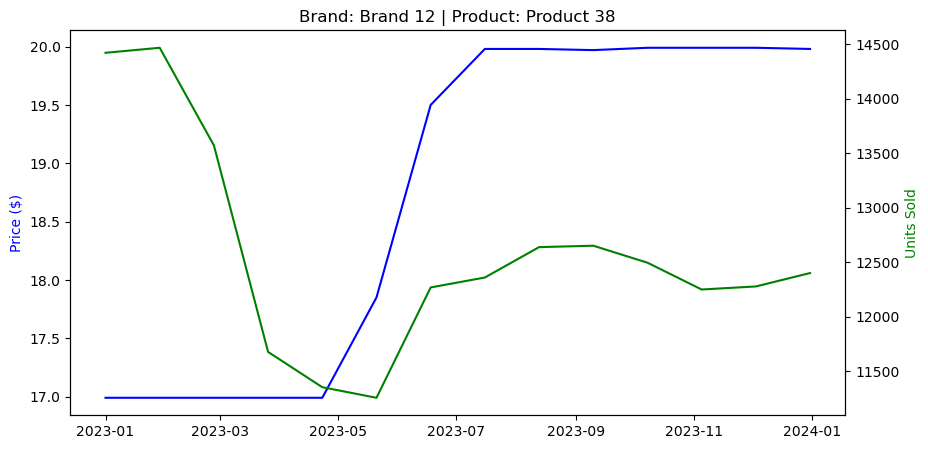

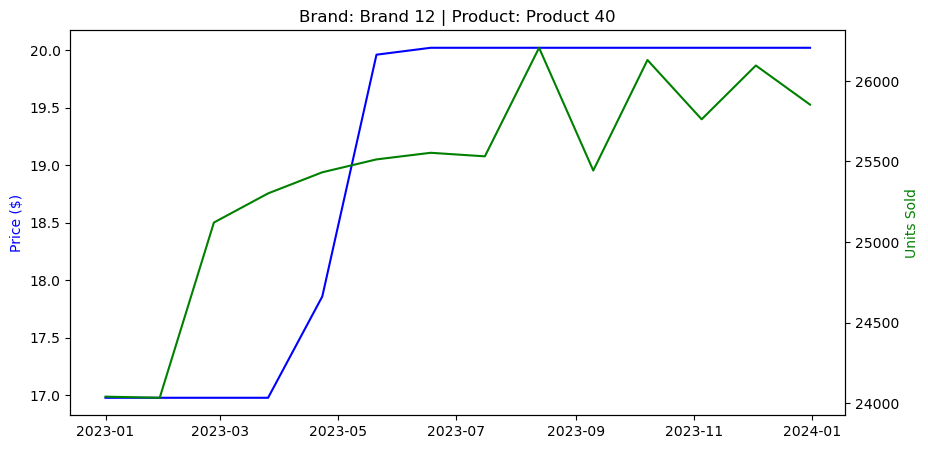

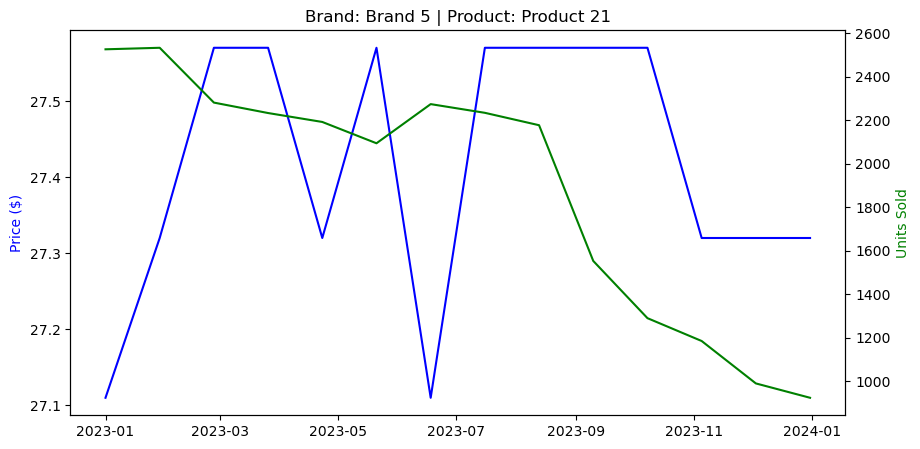

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt

sample_products = df.groupby(['BRAND', 'PRODUCT']).ngroup()
df['product_id'] = sample_products

# Pick a few unique product ids to visualize
for product_id in df['product_id'].unique()[:3]:
    sample = df[df['product_id'] == product_id]
    fig, ax1 = plt.subplots(figsize=(10,5))

    ax1.set_title(f"Brand: {sample['BRAND'].iloc[0]} | Product: {sample['PRODUCT'].iloc[0]}")
    ax1.plot(sample['END DATE'], sample['Price'], color='blue', label='Price')
    ax1.set_ylabel('Price ($)', color='blue')
    ax2 = ax1.twinx()
    ax2.plot(sample['END DATE'], sample['Units'], color='green', label='Units')
    ax2.set_ylabel('Units Sold', color='green')
    plt.show()


## Step 6: Estimate Price Elasticity of Demand

In [12]:
import numpy as np

# Розрахунок відсоткової зміни
df['Price Change %'] = df.groupby(['BRAND', 'PRODUCT'])['Price'].pct_change() * 100
df['Units Change %'] = df.groupby(['BRAND', 'PRODUCT'])['Units'].pct_change() * 100

# Видаляємо випадки без зміни ціни або з занадто малими змінами (наприклад, <1%)
df_filtered = df[abs(df['Price Change %']) >= 1].copy()

# Обрахунок еластичності
df_filtered['Elasticity'] = df_filtered['Units Change %'] / df_filtered['Price Change %']

# Видаляємо аномалії
df_filtered = df_filtered.replace([np.inf, -np.inf], np.nan).dropna(subset=['Elasticity'])
df_filtered = df_filtered[(df_filtered['Elasticity'] > -10) & (df_filtered['Elasticity'] < 10)]


In [13]:
avg_elasticity = df_filtered['Elasticity'].mean()
print(f"Середня еластичність: {avg_elasticity:.2f}")

Скоригована середня еластичність: -0.71


## Step 7: Scenario - If Our Price Increases by 10%

In [14]:
current_price = 19.97
new_price = current_price * 1.10
price_change_pct = 10

predicted_units_change_pct = avg_elasticity * price_change_pct
avg_units = 1000  # або замінити реальним середнім

predicted_units = avg_units * (1 + predicted_units_change_pct / 100)
predicted_revenue = predicted_units * new_price

print(f"Predicted % Change in Units: {predicted_units_change_pct:.2f}%")
print(f"Predicted Units: {predicted_units:.0f}")
print(f"Predicted Revenue: ${predicted_revenue:,.2f}")


Predicted % Change in Units: -7.08%
Predicted Units: 929
Predicted Revenue: $20,411.80


## Step 8: Conclusions and Recommendations

Conclusions:
The negative elasticity (-7.08%) means that:
Demand for the product will decrease by about 7.08% if the price is increased by 10%.
This is typical behavior for an elastic good: price increase → sales decrease.
Sales will drop from ~1000 units to ~929 units, but:
The total revenue will increase to $20,411.80, even though the sales volume is lower.
This is possible because the higher price will partially or fully compensate for the decrease in volume.

Financial conclusion:
If the goal is to maximize revenue, then this price increase is justified (revenue increased from $19,970 to $20,411.80).
